<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Content-based Course Recommender System using Course Similarities**


Estimated time needed: **45** minutes


In one of the previous lab, you have learned and practiced how to calculate the similarity between two courses using Bag of Words (BoW) features. For example, the similarity between course1 `Machine Learning for Everyone` and course2 `Machine Learning for Beginners` are `75%` as shown below.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_2/images/course_sim.png)


As we mentioned before, the content-based recommender system is highly based on the similarity calculation among items. The similarity or closeness of items is measured based on the similarity in the content or features of those items. The course genres are important features, and in addition to that, the BoW value is another important type of feature to represent course textual content. 


In this lab, you will apply the course similarities metric to recommend  new courses which are similar to a user's presently enrolled courses.


## Objectives


After completing this lab you will be able to:


* Obtain the similarity between courses from a course similarity matrix
* Use the course similarity matrix to find and recommend new courses which are similar to enrolled courses


----


## Prepare and setup lab environment


Let's first install and import the required libraries:


In [1]:
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# also set a random state
rs = 123

Next, let's load a pre-made course similarity matrix. If you are interested, you could easily calculate such a similarity matrix by iterating through all possible course pairs and calculating their similarities.


In [4]:
sim_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/sim.csv"

In [5]:
sim_df = pd.read_csv(sim_url)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.033944,0.028239,0.018270,0.094759,0.060474,0.064851,0.053856,0.039467,0.036539,0.060474,...,0.047186,0.116008,0.137406,0.211743,0.256220,1.000000,0.211520,0.168595,0.129766,0.263734
303,0.076825,0.063911,0.082698,0.030638,0.030415,0.000000,0.000000,0.119098,0.055132,0.045622,...,0.177989,0.092381,0.145126,0.527636,0.249675,0.211520,1.000000,0.242269,0.416067,0.178384
304,0.072898,0.138270,0.133400,0.017443,0.129871,0.009285,0.000000,0.254274,0.094165,0.025974,...,0.153128,0.105191,0.138692,0.281108,0.132977,0.168595,0.242269,1.000000,0.220159,0.128902
305,0.039276,0.031367,0.012684,0.018796,0.000000,0.015008,0.024926,0.082199,0.076102,0.055978,...,0.149234,0.093962,0.162170,0.476644,0.222350,0.129766,0.416067,0.220159,1.000000,0.126274


The similarity matrix is a real number, symmetric metric with each element representing the similarity value (ranged 0 to 1) between course index `i` and course index `j`. 


We could use `seaborn` to visualize the similarity metric, and since it is symmetric, we can just show the triangular  matrix (lower left):


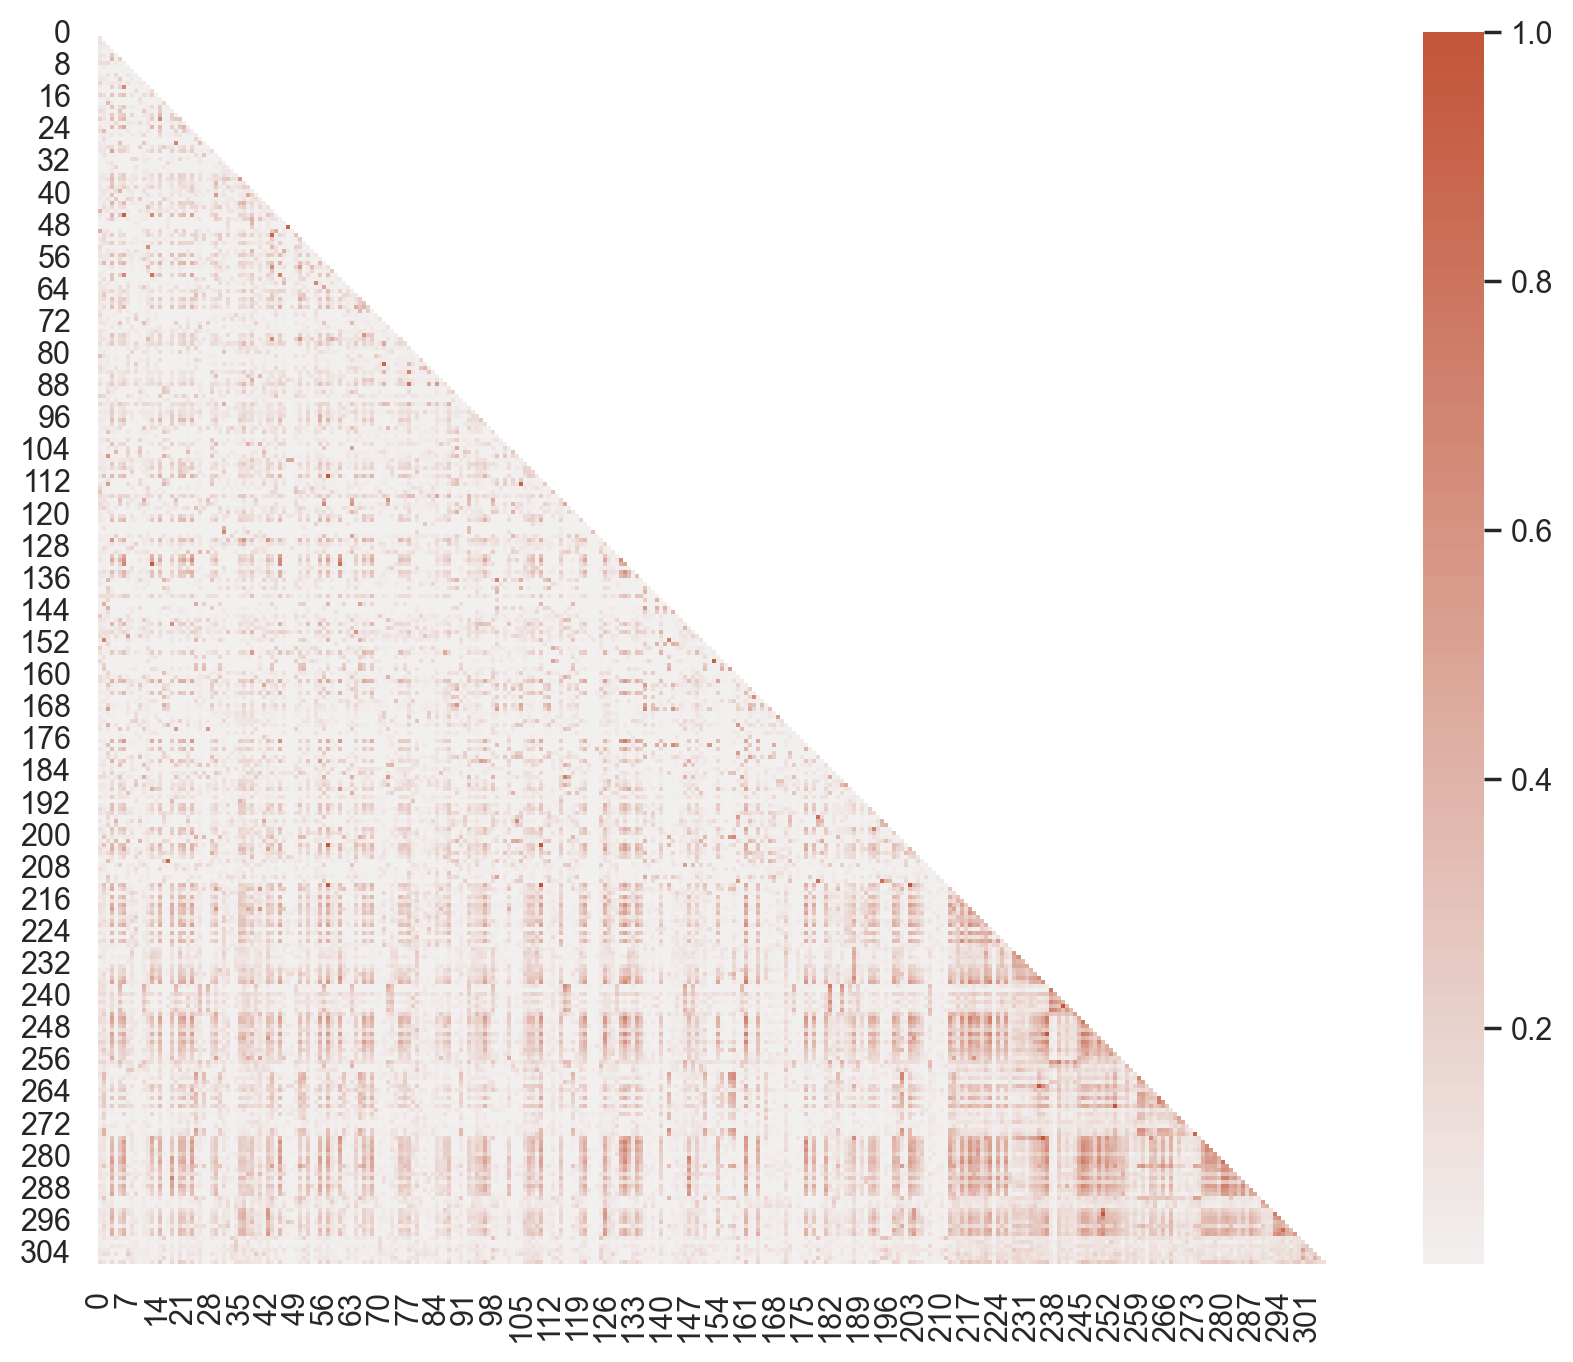

In [13]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(sim_df, dtype=bool)) # to mask upper right part
_, ax = plt.subplots(figsize=(12, 8), dpi = 200)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(sim_df, mask=mask, cmap=cmap, vmin=0.01, vmax=1, center=0, square=True)
plt.show()

As we can see from the heatmap; there are many hot spots, which means many courses are similar to each other. Such patterns suggest that it is possible to build a recommender system based on course similarities. 


Let's take a look at a quick example:


In [14]:
# Let's first load the course content and BoW dataset
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bow_df = pd.read_csv(bow_url)

In [83]:
course_df.head()

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson swift and node red,have fun with iot and learn along the way if you re a swift developer and want to learn more about iot and watson ai services in the cloud raspberry pi and node red you ve found the right place you ll build iot apps to read temperature data take pictures with a raspcam use ai to recognize the objects in those pictures and program an irobot create 2 robot
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with large datasets takes along time in this course you will learn how to use accelerated gpu hardware to overcome the scalability problem in deep learning \nyou can use accelerated hardware such as google s tensor processing unit tpu or nvidia gpu to accelerate your convolutional neural network computations time on the cloud these chips are specifically designed to support the training of neural networks as well as the use of trained networks inference accelerated hardware has recently been proven to significantly reduce training time \nbut the problem is that your data might be sensitiveand you may not feel comfortable uploading it on a public cloud preferring to analyze it on premise in this case you need to use an in house system with gpu support one solution is to use ibm s power systems with nvidia gpu and power ai the power ai platform supports popular machine learning libraries and dependencies including tensorflow caffe torch and theano \nin this course you ll understand what gpu based accelerated hardware is and how it can benefit your deep learning scaling needs you ll also deploy deep learning networks on gpu accelerated hardware for several problems including the classification of images and videos
2,GPXX0ZG0EN,consuming restful services using the reactive jax rs client,learn how to use a reactive jax rs client to asynchronously invoke restful microservices over http
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing framework used for performing large scale data analysis sparkr provides a distributed data frame api that enables structured data processing with a syntax familiar to r users \n
4,GPXX0Z2PEN,containerizing packaging and running a spring boot application,learn how to containerize package and run a spring boot application on an open liberty server without modification


In [15]:
bow_df.head()

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1


First, we want to mention that the matrix indices are course indices (such as `0, 1, 2, 3`). Very often we need to query the actual course ids (such as `ML0151EN` and `ML0101ENv3`) based on course indices and vice versa. We can save the course id's and indices into two dictionaries for late queries:


Then, based on the `doc_index` and `doc_id` columns, we create an index to id mapping and another id to index mapping in two Python dictionaries:


In [16]:
# Create course id to index and index to id mappings
def get_doc_dicts(bow_df):
    # Group the DataFrame by course index and ID, and get the maximum value for each group
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    # Create a dictionary mapping indices to course IDs
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    # Create a dictionary mapping course IDs to indices
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    # Clean up temporary DataFrame
    del grouped_df
    return idx_id_dict, id_idx_dict

Now suppose we have two example courses:


In [17]:
course1 = course_df[course_df['COURSE_ID'] == "ML0151EN"]
course1

,COURSE_ID,TITLE,DESCRIPTION
200,ML0151EN,machine learning with r,this machine learning with r course dives into...


In [18]:
course2 = course_df[course_df['COURSE_ID'] == "ML0101ENv3"]
course2

,COURSE_ID,TITLE,DESCRIPTION
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...


From their titles we can see they are all about machine learning. As such, they should be very similar to each other. Let's try to find their similarity in the similarity matrix.

With their course ids, we can use the `id_idx_dict` dictionary to query their row and column index on the similarity matrix:


In [19]:
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)
idx1 = id_idx_dict["ML0151EN"]
idx2 = id_idx_dict["ML0101ENv3"]
print(f"Course 1's index is {idx1} and Course 2's index is {idx2}")

Course 1's index is 200 and Course 2's index is 158


Then we can locate their similarity value in row 200 and col 158, `sim_matrix[200][158]`:


In [20]:
sim_matrix = sim_df.to_numpy()

In [21]:
sim = sim_matrix[idx1][idx2]
sim

np.float64(0.6626221399549089)

It's about 66% meaning these two courses are quite similar to each other.


### TASK: Find courses which are similar enough to your enrolled courses.


Now you know how to easily use the pre-computed similarity matrix to query the similarity between any two courses. Do you want to make some course recommendations for yourself?

Let's assume you are an end-user of the online course platform and already audited or completed some courses previously. Next, you expect the system would recommend similar courses based on your enrollments history.


From the full course list, choose any courses that may interest you, such as those machine learning related courses:


In [81]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
#course_df[['COURSE_ID', 'TITLE']]

In [23]:
# Reset pandas settings
pd.reset_option('display.max_rows')
pd.reset_option('max_colwidth')

_TODO: Browse the course list and choose your interested courses_ 


In [66]:
enrolled_course_ids = ['ML0122EN', 'PA0101EN', 'excourse66'] # add your interested coures id to the list

In [67]:
enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
enrolled_courses

,COURSE_ID,TITLE,DESCRIPTION
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with large datasets takes along time in this course you will learn how to use accelerated gpu hardware to overcome the scalability problem in deep learning \nyou can use accelerated hardware such as google s tensor processing unit tpu or nvidia gpu to accelerate your convolutional neural network computations time on the cloud these chips are specifically designed to support the training of neural networks as well as the use of trained networks inference accelerated hardware has recently been proven to significantly reduce training time \nbut the problem is that your data might be sensitiveand you may not feel comfortable uploading it on a public cloud preferring to analyze it on premise in this case you need to use an in house system with gpu support one solution is to use ibm s power systems with nvidia gpu and power ai the power ai platform supports popular machine learning libraries and dependencies including tensorflow caffe torch and theano \nin this course you ll understand what gpu based accelerated hardware is and how it can benefit your deep learning scaling needs you ll also deploy deep learning networks on gpu accelerated hardware for several problems including the classification of images and videos
79,PA0101EN,predictive modeling fundamentals i,the predictive modelling fundamentals i course where students can take this course many times as they wish and is totally free after the students completed the course they will be to print their online certificate of achievement labs are available for download only for free trial of ibm spss modeler
279,excourse66,executive data science capstone,the executive data science capstone the specialization s culminating project is an opportunity for people who have completed all four eds courses to apply what they ve learned to a real world scenario developed in collaboration with zillow a data driven online real estate and rental marketplace and datacamp a web based platform for data science programming your task will be to lead a virtual data science team and make key decisions along the way to demonstrate that you have what it takes to shepherd a complex analysis project from start to finish for the final project you will prepare and submit a presentation which will be evaluated and graded by your fellow capstone participants


Given the full course list, we can find those unselected courses:


In [68]:
all_courses = set(course_df['COURSE_ID'])

In [69]:
unselected_course_ids = all_courses.difference(enrolled_course_ids)
#unselected_course_ids

Now, you can iterate each unselect course and check if it is similar enough to any of your selected courses. If the similarity is larger than a threshold such as 0.5 or 0.6, then add it to your course recommendation list:


_TODO: Complete the following method to recommend courses which are similar to your enrolled courses_


In [164]:
def generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix, threshold):
    # Create a dictionary to store your recommendation results
    res = {}
    # Set a threshold for similarity
    #threshold = 0.6
    # Iterate over enrolled courses
    for enrolled_course in enrolled_course_ids:
        # Iterate over unselected courses
        for unselect_course in unselected_course_ids:
            # Check if both enrolled and unselected courses exist in the id_idx_dict
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:
                # Initialize similarity value
                sim = 0
                # Find the two indices for each enrolled_course and unselect_course, based on their two ids
                # Calculate the similarity between an enrolled_course and an unselect_course
                # e.g., Course ML0151EN's index is 200 and Course ML0101ENv3's index is 158                
                # Find the similarity value from the sim_matrix
                id_row = id_idx_dict[f'{enrolled_course}']
                id_col = id_idx_dict[f'{unselect_course}']
                sim = sim_matrix[id_row][id_col]
                 # Check if the similarity exceeds the threshold
                if sim > threshold:
                    # Update recommendation dictionary with course ID and similarity score
                    if unselect_course not in res:
                        # If the unselected course is not already in the recommendation dictionary (`res`), add it.
                        res[unselect_course] = sim
                    else:
                        # If the unselected course is already in the recommendation dictionary (`res`), compare the similarity score.
                        # If the current similarity score is greater than or equal to the existing similarity score for the course,
                        # update the similarity score in the recommendation dictionary (`res`) with the current similarity score.
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim
    # Sort the results by similarity. Store as the recommendation dictionary.
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [165]:
generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix, threshold = 0.5)

{'ML0122ENv3': np.float64(0.6815739441431503),
 'excourse65': np.float64(0.5503223564192887),
 'DS0110EN': np.float64(0.5376667608497979),
 'excourse63': np.float64(0.5220467592627),
 'excourse06': np.float64(0.5062378679249854)}

<details>
    <summary>Click here for Hints</summary>
    
You can find the indices of the courses by using `id_idx_dict` dictionary, for example `id_idx_dict[enrolled_course]`. Then use `sim_matrix` to find the similarity of the courses as was shown earlier in the lab. 
   

The completed `generate_recommendations_user(...)` may ouput a dictionary like this:


{'ML0151EN': 0.6626221399549089,
 'excourse47': 0.6347547807096177,
 'excourse46': 0.6120541193300345}


### TASK: Generate course recommendations based on course similarities for all test uesrs


In the previous task, you made some recommendations for yourself. Next, let's try to make recommendations for all the test users in the test dataset.


In [142]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
test_users_df = pd.read_csv(test_users_url)

Let's look at how many test users we have in the dataset.


In [143]:
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}.")

Total numbers of test users 33901.


_TODO: Complete the ``generate_recommendations_for_all()`` method to generate recommendations for all users. You may implement the task with different solutions_


In [168]:
def generate_recommendations_for_all(id_idx_dict, sim_matrix, threshold = 0.6):
    users = []
    courses = []
    sim_scores = []
    
    sim_df = pd.read_csv(sim_url) # Course similarity matrix
    
    course_df = pd.read_csv(course_url) # Course content dataframe 
    all_courses = set(course_df['COURSE_ID'])
    
    bow_df = pd.read_csv(bow_url) # Course BoW features
    
    # Test user dataframe
    test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
    test_user_ids = test_users['user'].to_list()
    
    for user_id in test_user_ids:
        users.append(user_id)
        # For each user, call generate_recommendations_for_one_user() to generate the recommendation results
        # Save the result to courses, sim_scores list

        enrolled_course_ids = test_users[test_users['user']==user_id]['item']
        unselected_course_ids = all_courses.difference(enrolled_course_ids)            
        
        courses.append(list(generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix, threshold).keys()))
        sim_scores.append(list(generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix, threshold).values()))
        pass
    return users, courses, sim_scores

<details>
    <summary>Click here for Hints</summary>
    
Note that you can use `generate_recommendations_for_one_user` function to find the list of recommended courses for each user. Find the `enrolled_course_ids` list by simply finding them in the `test_users` list by running `test_users[test_users['user']==user_id]['item']` and to find the unselected courses list you can apply `all_courses.difference()` with `enrolled_course_ids` as it's parameter (as done earlier in the lab). (Keep the last 2 parameters of `generate_recommendations_for_one_user` the same)
</details>


After you completed the `generate_recommendations_for_all()` function, you can call it to save the results into a dataframe:


In [240]:
users, courses, sim_scores = generate_recommendations_for_all(id_idx_dict, sim_matrix, threshold = 0.6)

res_dict = {}
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = sim_scores
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
print(res_df.shape)
res_df.head()

(33901, 3)


,USER,COURSE_ID,SCORE
0,2,[WA0103EN],[0.6311528416041716]
1,4,[WA0101EN],[0.6311528416041716]
2,5,[WA0101EN],[0.6311528416041716]
3,7,[],[]
4,8,[],[]


Similar to the previous user profile and course genre lab, with the recommendations generated for each user, you need to write some extra analytic code to answer the following questions:


- On average, how many new/unseen courses have been recommended to each user?
- What are the most frequently recommended courses? Return the top-10 commonly recommended courses across all users?


In [241]:
n_courses = []
for i in range(res_df.shape[0]):
    n_courses.append(len(res_df['COURSE_ID'][i]))
np.mean(n_courses)

np.float64(1.0763989262853604)

In [242]:
res_df_explode = res_df.explode(['COURSE_ID', 'SCORE'])
res_df_explode = res_df_explode.dropna()

In [245]:
top_courses_df = res_df_explode.groupby('COURSE_ID').size().sort_values(ascending = False).reset_index(name = 'count')
top_10_courses_df = top_courses_df[:14]
top_10_courses_count_title_merge = pd.merge(top_10_courses_df[['COURSE_ID', 'count']], 
                                            course_df[['COURSE_ID', 'TITLE']], 
                                            how = 'left', 
                                            left_on = 'COURSE_ID', 
                                            right_on = 'COURSE_ID')
print('Top-10 commonly recommended courses for all test users:')
for i in top_10_courses_count_title_merge['TITLE']:
    print(i)

Top-10 commonly recommended courses for all test users:
introduction to data science in python
introduction to data science in python
watson analytics for social media
data science with open data
build your own chatbots
data science fundamentals for data analysts
a crash course in data science
deep learning with tensorflow
text analytics 101
deep learning with tensorflow
deep learning with tensorflow
accelerating deep learning with gpus
introduction to cloud computing
ibm cloud essentials   v3


For example, suppose we have only 3 test users, each user receives the following recommendations:


- User1: ['course1', 'course2']
- User2: ['course3', 'course4']
- User3: ['course3', 'course4', 'course5']


Then, the average recommended courses per user is $(2 + 2 + 3) / 3 = 2.33$. The top-2 recommended courses are: `course3`: 2 times, and `course4`: 2 times.


Note that the answers may depend on your similarity threshold (default is 0.6). A lower similarity threshold yields more recommended courses but with smaller irrelevance.

Ideally, we should limit the maximum course recommendations for each user to be less than 20 courses per user.


## Authors


[Yan Luo]((https://www.linkedin.com/in/yan-luo-96288783/)


### Other Contributors


```toggle## Change Log
```


```toggle|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```
```toggle|-|-|-|-|
```
```toggle|2021-10-25|1.0|Yan|Created the initial version|
```


Copyright © 2021 IBM Corporation. All rights reserved.
